In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv("../00_data/merged_all.csv", sep=";", decimal=",")
df.dtypes

date                          object
hour                          object
day_ahead_price              float64
intraday_price               float64
price_diff                   float64
solar_capacity                 int64
solar_generation_actual        int64
solar_profile                 object
solar_generation_forecast      int64
solar_forecast_error           int64
wind_capacity                  int64
wind_generation_actual         int64
wind_profile                  object
wind_generation_forecast       int64
wind_forecast_error            int64
dtype: object

In [29]:
# merging date and hour and converting to datetime object
df_clean = df
df_clean["datetime"] = df_clean["date"].map(str) + " " + df_clean["hour"].str.slice(1, 3) + ":00:00"
cols = df_clean.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_clean = df_clean[cols]
df_clean["datetime"] = pd.to_datetime(df_clean["datetime"])
df_clean["date"] = pd.to_datetime(df_clean["date"])
df_clean["hour"] = df_clean["datetime"].dt.time
df_clean = df_clean.set_index("datetime")
df_clean.dtypes

date                         datetime64[ns]
hour                                 object
day_ahead_price                     float64
intraday_price                      float64
price_diff                          float64
solar_capacity                        int64
solar_generation_actual               int64
solar_profile                        object
solar_generation_forecast             int64
solar_forecast_error                  int64
wind_capacity                         int64
wind_generation_actual                int64
wind_profile                         object
wind_generation_forecast              int64
wind_forecast_error                   int64
dtype: object

In [30]:
df_clean.head()

,date,hour,day_ahead_price,intraday_price,price_diff,solar_capacity,solar_generation_actual,solar_profile,solar_generation_forecast,solar_forecast_error,wind_capacity,wind_generation_actual,wind_profile,wind_generation_forecast,wind_forecast_error
datetime,,,,,,,,,,,,,,,
2016-01-01 00:00:00,2016-01-01,00:00:00,23.86,29.34,-5.48,39021,0,0,0,0,44325,8648,0.1951,6033,2615
2016-01-01 01:00:00,2016-01-01,01:00:00,22.39,24.28,-1.89,39021,0,0,0,0,44325,8579,0.1936,7421,1158
2016-01-01 02:00:00,2016-01-01,02:00:00,20.59,25.26,-4.67,39021,0,0,0,0,44325,8542,0.1928,7266,1276
2016-01-01 03:00:00,2016-01-01,03:00:00,16.81,20.24,-3.43,39021,0,0,0,0,44325,8443,0.1905,7180,1263
2016-01-01 04:00:00,2016-01-01,04:00:00,17.41,21.94,-4.53,39021,0,0,0,0,44325,8295,0.1871,7016,1279


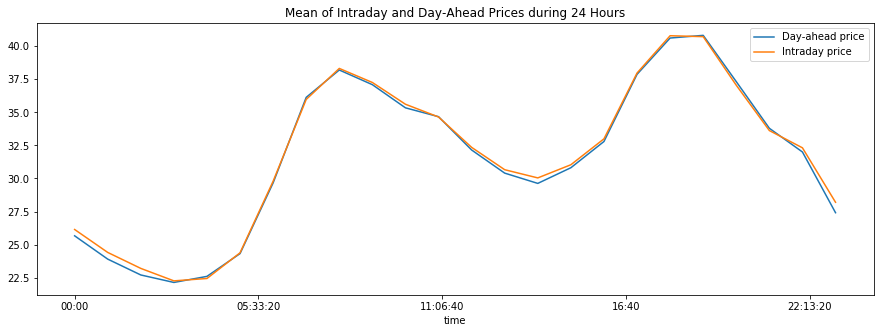

In [31]:
plot_data = df_clean.groupby(["hour"])["day_ahead_price", "intraday_price", "price_diff",
                                       "solar_generation_forecast", "solar_generation_actual",
                                       "solar_forecast_error", "wind_generation_forecast",
                                       "wind_generation_actual", "wind_forecast_error"].mean()

fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(plot_data.index, plot_data["day_ahead_price"].values, 
        plot_data.index, plot_data["intraday_price"].values)
ax.set_title("Mean of Intraday and Day-Ahead Prices during 24 Hours")
ax.legend(["Day-ahead price", "Intraday price"]);

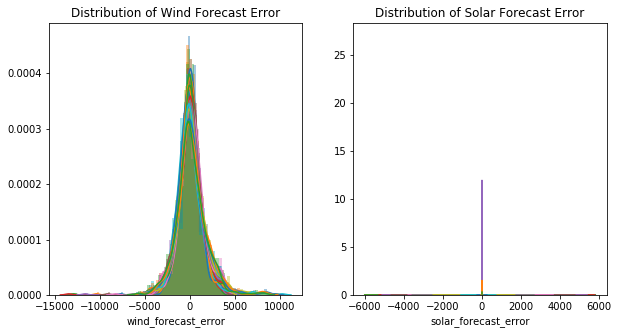

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

for hour in range(0, 23):
    globals()["df" + str(hour)] = df_clean.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["wind_forecast_error"],
                 ax=ax1).set_title("Distribution of Wind Forecast Error")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"],
                 ax=ax2).set_title("Distribution of Solar Forecast Error")

In [42]:
print(df_clean["solar_forecast_error"].describe())
print(df_clean["wind_forecast_error"].describe())

count    17544.000000
mean       -25.350718
std        688.201775
min      -5024.000000
25%        -45.000000
50%          0.000000
75%          0.000000
max       4806.000000
Name: solar_forecast_error, dtype: float64
count    17544.000000
mean       125.303466
std       1500.853278
min     -13487.000000
25%       -680.250000
50%         41.000000
75%        854.000000
max      10320.000000
Name: wind_forecast_error, dtype: float64


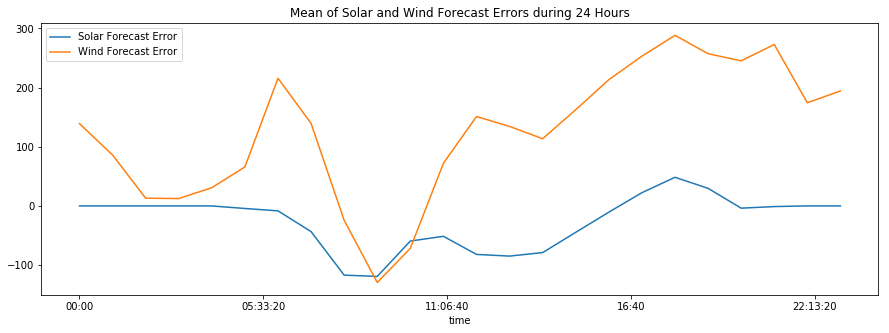

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

ax.plot(plot_data.index, plot_data["solar_forecast_error"].values, 
        plot_data.index, plot_data["wind_forecast_error"].values)
ax.set_title("Mean of Solar and Wind Forecast Errors during 24 Hours")
ax.legend(["Solar Forecast Error", "Wind Forecast Error"]);

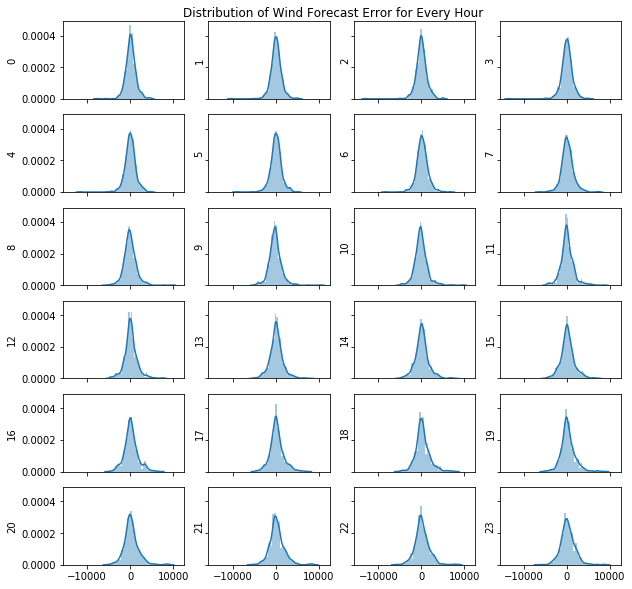

In [56]:
fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = df_clean.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["wind_forecast_error"], ax=ax, axlabel=False)
    
plt.suptitle("Distribution of Wind Forecast Error for Every Hour", y=0.9);

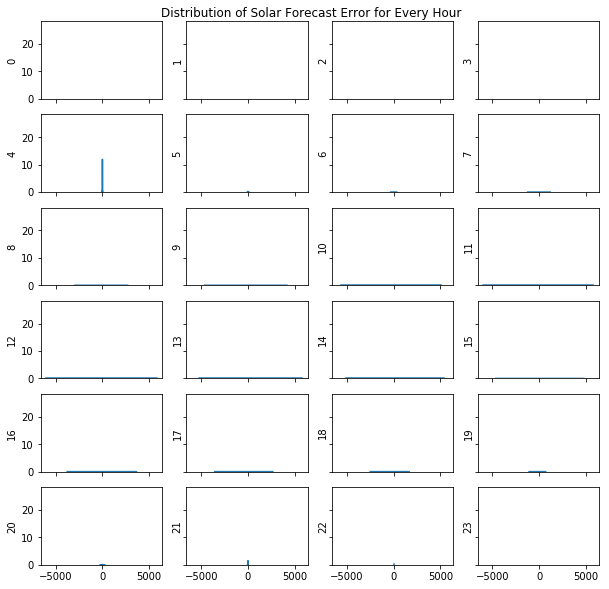

In [57]:
fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = df_clean.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False)
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour", y=0.9);

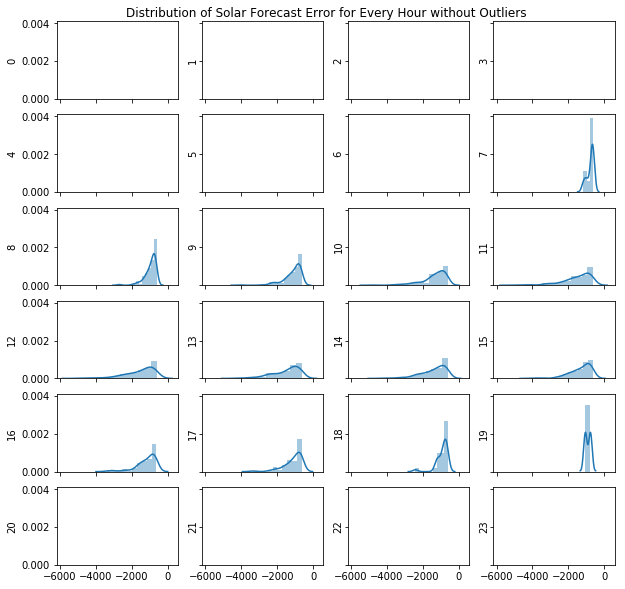

In [67]:
q = df["solar_forecast_error"].quantile(0.1)
no_solar_outliers = df_clean[df_clean["solar_forecast_error"] < q]

fig, axs = plt.subplots(6, 4, figsize=(10, 10), sharex=True, sharey=True)

for hour, ax in enumerate(fig.axes):
    ax.set_ylabel(str(hour))
    globals()["df" + str(hour)] = no_solar_outliers.between_time(str(hour) + ":00", str(hour) + ":59")
    sns.distplot(globals()["df" + str(hour)]["solar_forecast_error"], ax=ax, axlabel=False)
    
plt.suptitle("Distribution of Solar Forecast Error for Every Hour without Outliers", y=0.9);

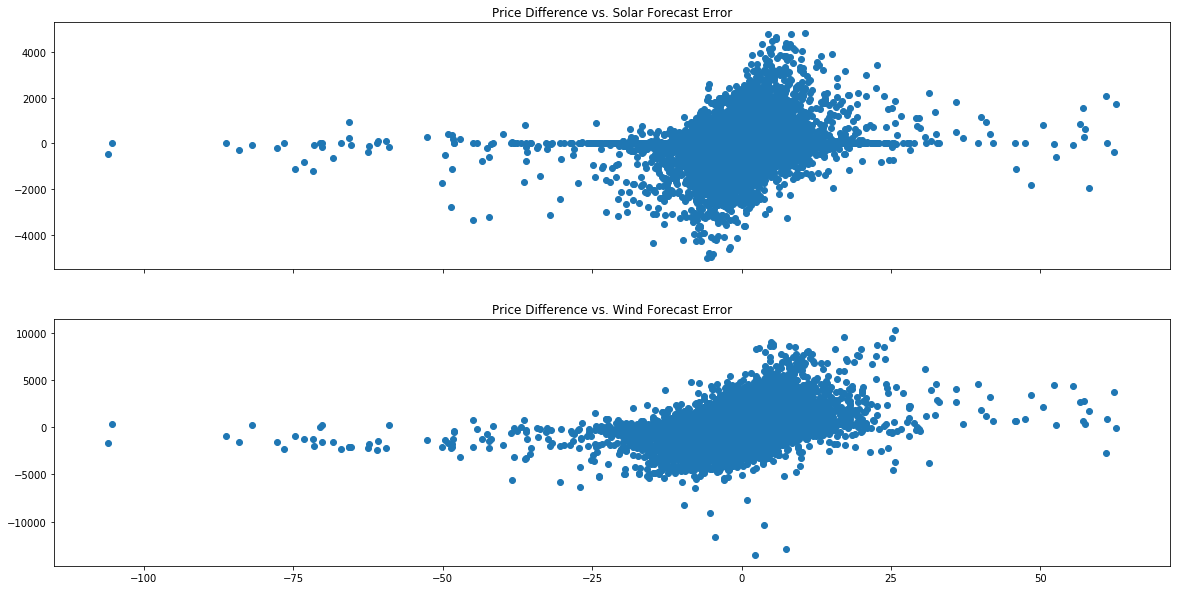

In [13]:
x = df["price_diff"]
y1 = df["solar_forecast_error"]
y2 = df["wind_forecast_error"]

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
ax1.scatter(x, y1)
ax1.set_title("Price Difference vs. Solar Forecast Error")
ax2.scatter(x, y2)
ax2.set_title("Price Difference vs. Wind Forecast Error");